In [1]:
from __future__ import print_function

In [2]:
from datetime import datetime

import matplotlib.pyplot as plt
from sapphire import download_data, Station
from sapphire.publicdb import download_data as publicdb_download_data
import tables
import zlib

%matplotlib inline

In [3]:
START = datetime(2016, 12, 4)
END = datetime(2016, 12, 5)
STATION = 501
FILENAME = 'traces-publicdb.h5'

In [4]:
data = tables.open_file(FILENAME, 'a')

In [5]:
download_data(data, '/s%d' % STATION, STATION, start=START, end=END)

100%|####################################################################################################|Time: 0:00:07


In [6]:
esd_events = data.root.s501.events

In [7]:
first_event = esd_events[0]
first_event

(0L, 1480809600, 716550813L, 1480809600716550813L, [311, 5, 652, 4], [3163, 0, 6832, 0], 1.3063000440597534, 0.0, 2.394700050354004, 0.0, 62.5, -999.0, 62.5, -999.0, 67.5)

In [8]:
ts = first_event['timestamp']
ns = first_event['nanoseconds']
ts, ns

(1480809600, 716550813)

# Trace uit API (per stuk)

In [9]:
s = Station(STATION)

In [10]:
traces = s.event_trace(ts, ns)

In [11]:
for idx in range(4):
    print ('trace ', idx, traces[idx][:15], '...')

trace  0 [1, 0, -2, -1, -1, -5, 0, 0, -2, 0, -1, -2, -1, -2, -2] ...
trace  1 [-1, 1, -2, -2, -1, 1, -1, 1, -2, 1, -3, 1, -1, 0, -3] ...
trace  2 [-2, 2, 1, 2, 0, 4, -1, 0, -1, 0, 0, -1, -1, 1, 0] ...
trace  3 [1, 0, 0, -1, 1, -3, 2, 0, -1, 0, 0, -1, -1, -3, 0] ...


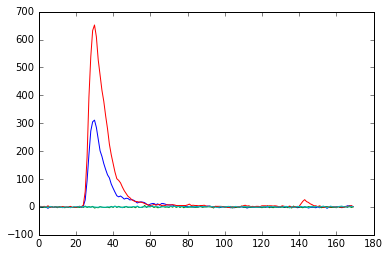

In [12]:
for idx in range(4):
    plt.plot(traces[idx])
plt.show()

# Download events + traces uit publicdb (ruwe database)
## (Als het echt niet anders kan...)

bovenaan dit notebook is `sapphire.publicdb.download_data` geimporteerd als `publicdb_download_data`

Deze functie download events (en *alle* andere RUWE data) uit de ruwe database (publicdb)
In de blobs zitten de traces.

In [13]:
# DIT DUURT LANG. Er is geen progress bar..
publicdb_download_data(data, '/publicdb_s%d' % STATION, STATION, start=START, end=END, get_blobs=True)

In [14]:
print(data)

traces-publicdb.h5 (File) u''
Last modif.: 'Mon Dec 05 08:59:13 2016'
Object Tree: 
/ (RootGroup) u''
/publicdb_s501 (Group) 'Data group'
/publicdb_s501/blobs (VLArray(218499,)) 'HiSPARC binary data'
/publicdb_s501/config (Table(1,)) 'HiSPARC configuration messages'
/publicdb_s501/events (Table(54624,)) 'HiSPARC event data'
/publicdb_s501/satellites (Table(24,)) 'HiSPARC satellite messages'
/publicdb_s501/singles (Table(86400,)) 'HiSPARC single messages'
/publicdb_s501/weather (Table(17180,)) 'HiSPARC weather data'



In [15]:
blobs = data.get_node('/publicdb_s501/blobs')
blobs[0]

'x\x9cmT[\x0e\xc30\x08\xbb\xd0>\xban\xe3q\xff\x8bmI \xd8dRTQ\xa0\xc4\x18\xd3\xdb\x1f\xb7\xcd\xa3\xf9\xf4\xc7\xeb\x1ag\xd8\xf3\x0c\xdb\xe7\xb1t\xa2\xb1+X\xe5\xbf\x9e\xe0\xcf\x9a\xcb3B;_"Z\xc5\xd1\x96\x99\x7f\x81\'\xaf\x1b\xcef[~\xab\x99/\x11\x8a\x1b5\xa3V\x1d\x85\xa1\xf0*\\P\xb9\xf8:\xefLn\x14\x01\t\xfb\xb5\xa0\xea\xd1&\x13\xd2\x1b1\xce\xb7\x02L\xd7\xb54\x05\xcc\xc6u\xb0\xf2&\xbf\x81D\xd8\x9e\xad\xb5:\xfeg(\xd4\xa6\x01\x06\x14\x89LC\x0e\xfcLZ\x94\x92\x83yVi\x17a\xf3\x184\xb2\x15\xa8Df\xc1\xce6\xa9\xaf\x94S\x89\x19\x9a*\xe5h\xef\x85\xa8\xf8\x1c\xd3t\x88\xc2]\x8d\x93\xdf\xa5\xe5q"!\x04\xe3\xd0\x94\x03\xda\x8bE+\x87T&\xa4h\xea\xdc>\x81(\xae\x98\xd4\xd6\xd0\xa2\xb1\x84\xe2C\xcf\xf1!~\xe5\xd3&\x8b8yF]\x939\x88\xff\x9b\xa5\xc7\xa5\xc2\x8b\xdc4\x89\xa5\x84\x99|N\xae\x9a\x08%\xd8\xd8\xfe\xfa\xbd\xb4\x1f\x14/Ex6\xed\x1f@\xeb\x11ZC\x8f6%\xed\xa6+!\xf9\xad\x9c\xfa\xbb\xc2\x14\x96\x12\nm\xf6K\x1bm\x9d\xc3\xc2`\xf0\\\xc8\x95\xecb)\xdb/\xb4\xb1\xe9_\x97\x19<c'

De blobs zijn gezipte strings:

In [16]:
zlib.decompress(blobs[0])

'29,28,28,27,28,27,29,30,30,27,27,27,30,29,29,28,27,27,28,27,27,28,29,28,28,28,27,27,30,31,29,28,28,27,29,30,29,28,31,28,28,28,26,27,29,29,28,27,29,29,28,27,26,28,30,29,28,27,28,29,28,30,28,29,28,30,28,28,29,29,27,29,28,26,30,28,31,28,27,29,27,28,30,29,29,30,29,27,29,29,30,26,30,28,28,29,27,28,28,29,29,29,29,24,29,30,27,27,27,30,29,28,28,27,27,29,28,28,30,28,29,27,29,28,27,29,29,29,28,31,28,28,30,28,28,29,29,28,29,28,27,29,28,29,30,29,30,29,28,28,28,29,28,27,29,27,27,28,28,28,29,28,29,28,28,29,29,28,28,26,27,28,28,30,28,29,29,28,28,30,29,27,30,28,29,28,29,28,29,30,29,28,27,28,29,30,28,29,27,28,27,28,28,27,28,29,28,26,29,26,30,29,28,28,28,28,27,27,29,28,30,28,26,28,28,29,29,29,28,27,28,27,29,28,27,27,28,29,29,28,27,27,28,28,28,28,30,27,29,30,27,27,29,28,29,29,30,28,27,30,28,30,29,28,27,29,29,27,31,29,28,27,28,28,27,30,29,27,27,29,28,28,28,28,30,28,29,27,25,29,29,28,29,28,29,28,29,27,29,28,27,29,30,29,28,28,28,31,30,29,28,29,29,29,29,28,31,28,29,29,30,27,29,29,29,27,30,27,28,28,29,26,29,

In [17]:
trace_string = zlib.decompress(blobs[0]).decode()

In [18]:
trace = list(map(int, trace_string.split(',')))

In [19]:
print(trace)

[29, 28, 28, 27, 28, 27, 29, 30, 30, 27, 27, 27, 30, 29, 29, 28, 27, 27, 28, 27, 27, 28, 29, 28, 28, 28, 27, 27, 30, 31, 29, 28, 28, 27, 29, 30, 29, 28, 31, 28, 28, 28, 26, 27, 29, 29, 28, 27, 29, 29, 28, 27, 26, 28, 30, 29, 28, 27, 28, 29, 28, 30, 28, 29, 28, 30, 28, 28, 29, 29, 27, 29, 28, 26, 30, 28, 31, 28, 27, 29, 27, 28, 30, 29, 29, 30, 29, 27, 29, 29, 30, 26, 30, 28, 28, 29, 27, 28, 28, 29, 29, 29, 29, 24, 29, 30, 27, 27, 27, 30, 29, 28, 28, 27, 27, 29, 28, 28, 30, 28, 29, 27, 29, 28, 27, 29, 29, 29, 28, 31, 28, 28, 30, 28, 28, 29, 29, 28, 29, 28, 27, 29, 28, 29, 30, 29, 30, 29, 28, 28, 28, 29, 28, 27, 29, 27, 27, 28, 28, 28, 29, 28, 29, 28, 28, 29, 29, 28, 28, 26, 27, 28, 28, 30, 28, 29, 29, 28, 28, 30, 29, 27, 30, 28, 29, 28, 29, 28, 29, 30, 29, 28, 27, 28, 29, 30, 28, 29, 27, 28, 27, 28, 28, 27, 28, 29, 28, 26, 29, 26, 30, 29, 28, 28, 28, 28, 27, 27, 29, 28, 30, 28, 26, 28, 28, 29, 29, 29, 28, 27, 28, 27, 29, 28, 27, 27, 28, 29, 29, 28, 27, 27, 28, 28, 28, 28, 30, 27, 29, 30,